<a href="https://colab.research.google.com/github/MulukenW/Tensor_Flow-Tutorials/blob/main/CNN_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.layers import BatchNormalization
from keras.layers import Dropout
import matplotlib.pyplot as plt

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170508288/170498071 [==============================] - 3s 0us/step


In [4]:
train_labels[0]

array([6], dtype=uint8)

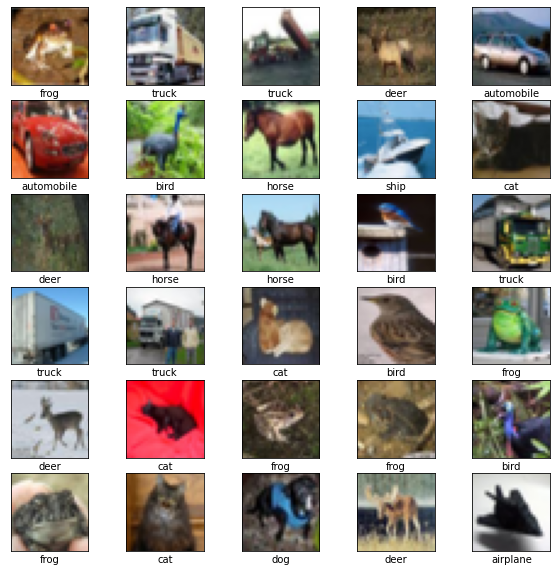

In [8]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [9]:
train_images.shape #(50000, 32, 32, 3)3is the channel of color

(50000, 32, 32, 3)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 12, 12, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 12, 12, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels,batch_size=64, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
782/782 [==============================] - 37s 8ms/step - loss: 1.8242 - accuracy: 0.3411 - val_loss: 1.4331 - val_accuracy: 0.4895
Epoch 2/10
782/782 [==============================] - 5s 7ms/step - loss: 1.4365 - accuracy: 0.4817 - val_loss: 1.2933 - val_accuracy: 0.5570
Epoch 3/10
782/782 [==============================] - 5s 7ms/step - loss: 1.2685 - accuracy: 0.5533 - val_loss: 1.0939 - val_accuracy: 0.6090
Epoch 4/10
782/782 [==============================] - 5s 7ms/step - loss: 1.1513 - accuracy: 0.5932 - val_loss: 1.0803 - val_accuracy: 0.6197
Epoch 5/10
782/782 [==============================] - 6s 7ms/step - loss: 1.0738 - accuracy: 0.6228 - val_loss: 0.9857 - val_accuracy: 0.6634
Epoch 6/10
782/782 [==============================] - 5s 7ms/step - loss: 1.0063 - accuracy: 0.6511 - val_loss: 0.9103 - val_accuracy: 0.6831
Epoch 7/10
782/782 [==============================] - 5s 7ms/step - loss: 0.9696 - accuracy: 0.6626 - val_loss: 0.9251 - val_accuracy: 0.6745
Epoch

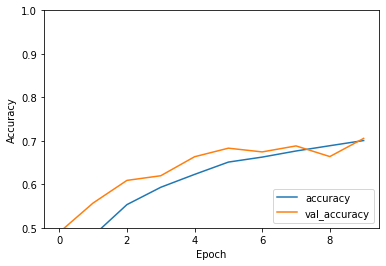

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
print("Training Accuracy:")
train_loss,train_acc=model.evaluate(train_images,  train_labels, verbose=2)
print("Testing Accuracy:")
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

Training Accuracy:
1563/1563 - 3s - loss: 0.6718 - accuracy: 0.7643
Testing Accuracy:
313/313 - 1s - loss: 0.8048 - accuracy: 0.7139
